In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import re
from unidecode import unidecode

# Setando o DataFrame e iniciando a limpeza de dados

In [2]:
dataframe_base = pd.read_csv("campanhas_base.csv", encoding='latin1', sep=';')
dataframe_base

,Campanha,Enviados,Data/Horário,% Abertura,Qtde Abertos,% Cliques,Qtde Cliques
0,Minicurso Gratuito com certificação - Inteligê...,375974,3 weeks ago,6.23%,23390,"0,32%",1042
1,Minicurso Gratuito com certificação - Inteligê...,379147,"Wed, Aug 13, 2025 04:00PM","6,67%",25114,"0,26%",948
2,Minicurso Gratuito com certificação - Inteligê...,379905,"Thu, Aug 07, 2025 05:30PM","7,79%",29496,0.72%,2742
3,Pós-Graduação é na POSESA!!! EAD em 12 x R$ 99...,3161,"Wed, Jul 30, 2025 11:40AM",40.21%,1272,51.85%,1639
4,Pós-Graduação é na POSESA!!! IMPERDÌVEL!!! EAD...,386135,"Mon, Jul 28, 2025 04:10PM",7.42%,28667,1.39%,5381
...,...,...,...,...,...,...,...
67,Pós-graduação em Advocacia,90743,"Fri, Aug 16, 2024 04:45PM",4.29%,3896,0.55%,502
68,É HOJE! Curso Gratuito de Marketing Jurídico +...,233016,"Wed, Sep 18, 2024 02:30PM",3.71%,8637,0.36%,836
69,GRATUITO - MARKETING JURÍDICO / TRANSMISSÃO AO...,235792,"Fri, Sep 13, 2024 05:15PM",4.63%,10917,0.41%,969
70,CURSO GRATUITO - MARKETING JURÍDICO,128241,"Mon, Sep 09, 2024 05:35PM",2.88%,3695,0.37%,471


In [3]:
dataframe_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Campanha      72 non-null     object
 1   Enviados      72 non-null     int64 
 2   Data/Horário  72 non-null     object
 3   % Abertura    72 non-null     object
 4   Qtde Abertos  72 non-null     int64 
 5   % Cliques     72 non-null     object
 6   Qtde Cliques  72 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 4.1+ KB


## Alterando o tipo dos dados de Colunas do DataFrame

In [4]:
dataframe_base['% Abertura'] = (
    dataframe_base['% Abertura']
    .astype(str)
    .str.replace('%', ' ', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

In [5]:
dataframe_base['% Cliques'] = (
    dataframe_base['% Cliques']
    .astype(str)
    .str.replace('%', '', regex=-False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

In [6]:
dataframe_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Campanha      72 non-null     object 
 1   Enviados      72 non-null     int64  
 2   Data/Horário  72 non-null     object 
 3   % Abertura    72 non-null     float64
 4   Qtde Abertos  72 non-null     int64  
 5   % Cliques     72 non-null     float64
 6   Qtde Cliques  72 non-null     int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 4.1+ KB


## Ajustando a data e hora com a função DateTime

In [7]:
from dateutil import parser
from datetime import datetime, timedelta

# Vamos criar uma função para tratar cada valor da coluna
def processar_data_horario(valor):
    try:
        valor = str(valor).strip()
        agora = datetime.now()

        if 'ago' in valor.lower():
            # Tratar valores relativos como '22 hrs ago', '3 weeks ago'
            partes = valor.lower().split()
            quantidade = int(partes[0])
            unidade = partes[1]

            if 'hr' in unidade:
                datahora = agora - timedelta(hours=quantidade)
            elif 'day' in unidade:
                datahora = agora - timedelta(days=quantidade)
            elif 'week' in unidade:
                datahora = agora - timedelta(weeks=quantidade)
            else:
                return pd.NaT, pd.NaT
        else:
            # Tratar datas absolutas como 'Thu, Jul 24, 2025 10:00AM'
            datahora = parser.parse(valor)

        data_formatada = datahora.strftime('%d/%m/%Y')
        hora_formatada = datahora.strftime('%H:%M')
        return pd.Series([data_formatada, hora_formatada])

    except Exception:
        return pd.Series([pd.NaT, pd.NaT])

# Aplica a função à coluna 'Data/Horário'
dataframe_base[['Data', 'Hora']] = dataframe_base['Data/Horário'].apply(processar_data_horario)



### Excluindo colunas desnecessárias

In [8]:
dataframe_base.drop('Data/Horário', axis=1)
pd.set_option('display.max_colwidth', None)

In [9]:
dataframe_base['Campanha']

0     Minicurso Gratuito com certificação - Inteligência Artificial no Direito - POSESA | 2 não enviados
1                      Minicurso Gratuito com certificação - Inteligência Artificial no Direito - POSESA
2                      Minicurso Gratuito com certificação - Inteligência Artificial no Direito - POSESA
3                                 Pós-Graduação é na POSESA!!! EAD em 12 x R$ 99,90 + Bônus exclusivo!!!
4                              Pós-Graduação é na POSESA!!! IMPERDÌVEL!!! EAD em 12 x R$ 99,90 sem juros
                                                     ...                                                
67                                                                            Pós-graduação em Advocacia
68                                           É HOJE! Curso Gratuito de Marketing Jurídico + Certificação
69                                  GRATUITO - MARKETING JURÍDICO / TRANSMISSÃO AO VIVO COM CERTIFICAÇÃO
70                                                     

## Padronizando o texto da coluna "Campanha"

In [10]:
# 1) CRIANDO UMA FUNÇÃO PARA PADRONIZAR O NOME DAS CAMPANHAS
def padronizar_texto(texto):
    texto = str(texto).lower()
    texto = texto.strip()
    texto = re.sub(r'\s+', ' ', texto)  # espaços múltiplos para 1
    texto = re.sub(r'[^\w\s]', '', texto)  # remover pontuações
    texto = re.sub(r'\|\s*\d+\s*[^a-zA-Z]*n[aã]o enviados?', '', texto)  # remove '2 não enviados'
    texto = re.sub(r'\b\d{1,2}x\s*r?\$?\d+[\.,]?\d*\b', '', texto)  # remove valores tipo 12x R$ 99,90
    texto = texto.replace('pose(sa)', 'posesa')  # padronizar "POSESA"
    texto = texto.strip()
    return texto

In [11]:
dataframe_base['Campanha'] = dataframe_base['Campanha'].apply(padronizar_texto)
dataframe_base.drop('Data/Horário', axis=1, inplace=True)
dataframe_base.head(15)

,Campanha,Enviados,% Abertura,Qtde Abertos,% Cliques,Qtde Cliques,Data,Hora
0,minicurso gratuito com certificação inteligência artificial no direito posesa 2 não enviados,375974,6.23,23390,0.32,1042,19/08/2025,20:27
1,minicurso gratuito com certificação inteligência artificial no direito posesa,379147,6.67,25114,0.26,948,13/08/2025,16:00
2,minicurso gratuito com certificação inteligência artificial no direito posesa,379905,7.79,29496,0.72,2742,07/08/2025,17:30
3,pósgraduação é na posesa ead em 12 x r 9990 bônus exclusivo,3161,40.21,1272,51.85,1639,30/07/2025,11:40
4,pósgraduação é na posesa imperdìvel ead em 12 x r 9990 sem juros,386135,7.42,28667,1.39,5381,28/07/2025,16:10
5,pósgraduação é na posesa imperdìvel ead em 12 x r 9990 sem juros,333252,8.44,28113,0.27,891,24/07/2025,10:00
6,pósgraduação é na posesa imperdìvel ead em 12 x r 9990 sem juros,331583,5.88,19490,0.13,418,11/07/2025,14:30
7,pósgraduação é na posesa imperdìvel ead em 12 x r 9990 sem juros,335791,13.64,45810,0.58,1943,09/07/2025,14:55
8,pósgraduação ead em advocacia trabalhista e previdenciária posesa,296357,7.18,21271,1.13,3354,02/07/2025,14:35
9,dia dos namorados é com pósgraduação da posesa,393839,6.96,27402,1.04,4106,12/06/2025,15:10


## Agrupando campanhas semelhantes

In [12]:
# Criando uma função para renomear as camapnhas com dados a serem analisados juntos

def renomear_campanhas(texto):
    if 'inteligência artificial' in texto:
        return "MiniCurso IA"
    elif 'marketing jurídico' in texto:
        return "MiniCurso MJ"
    elif 'direito processual' in texto:
        return "DPCC"
    elif 'black friday' in texto:
        return "Campanha Black Friday"
    elif 'imobiliária' in texto:
        return "Pós Imobiliária"
    elif 'empresarial' in texto:
        return "Pós Empresarial"
    elif 'familiar' in texto:
        return "Pós Familiar"
    elif 'namorados' in texto:
        return 'Campanha Namorados'
    elif 'habeas corpus' in texto:
        return "MiniCurso HC"
    elif 'consumidor' in texto:
        return "Campanha Consumidor"
    elif 'mba' in texto:
        return "Pós MBA"
    elif 'páscoa' in texto:
        return "Campanha Páscoa"
    else:
        return "Diversos"
    

In [13]:
dataframe_base['Campanha'] = dataframe_base['Campanha'].apply(renomear_campanhas)
dataframe_base

,Campanha,Enviados,% Abertura,Qtde Abertos,% Cliques,Qtde Cliques,Data,Hora
0,MiniCurso IA,375974,6.23,23390,0.32,1042,19/08/2025,20:27
1,MiniCurso IA,379147,6.67,25114,0.26,948,13/08/2025,16:00
2,MiniCurso IA,379905,7.79,29496,0.72,2742,07/08/2025,17:30
3,Diversos,3161,40.21,1272,51.85,1639,30/07/2025,11:40
4,Diversos,386135,7.42,28667,1.39,5381,28/07/2025,16:10
...,...,...,...,...,...,...,...,...
67,Diversos,90743,4.29,3896,0.55,502,16/08/2024,16:45
68,MiniCurso MJ,233016,3.71,8637,0.36,836,18/09/2024,14:30
69,MiniCurso MJ,235792,4.63,10917,0.41,969,13/09/2024,17:15
70,MiniCurso MJ,128241,2.88,3695,0.37,471,09/09/2024,17:35


# Agrupando as campanhas:
### Descartar a coluna Hora e reescrever Data como período;
### Calcular os percentuais em grupos;

In [14]:

# 1. Descartar 'Hora'
dataframe_grouped = dataframe_base.drop(columns=['Hora'])

# 2. Converter 'Data' para datetime
dataframe_grouped['Data'] = pd.to_datetime(dataframe_grouped['Data'], dayfirst=True)

# 3. Agrupar os dados
agrupado = dataframe_grouped.groupby('Campanha').agg({
    'Enviados': 'sum',
    'Qtde Abertos': 'sum',
    'Qtde Cliques': 'sum',
    'Data': ['min', 'max']  # para gerar o período
})

# 4. Ajustar colunas após o groupby com múltiplos níveis
agrupado.columns = ['Enviados', 'Qtde Abertos', 'Qtde Cliques', 'Data_Inicial', 'Data_Final']
agrupado = agrupado.reset_index()

# 5. Calcular percentuais
agrupado['% Abertura'] = (agrupado['Qtde Abertos'] / agrupado['Enviados']) * 100
agrupado['% Cliques'] = (agrupado['Qtde Cliques'] / agrupado['Enviados']) * 100

# 6. Arredondar os percentuais
agrupado['% Abertura'] = agrupado['% Abertura'].round(2)
agrupado['% Cliques'] = agrupado['% Cliques'].round(2)

# 7. Criar coluna de período no formato desejado
agrupado['Período'] = agrupado['Data_Inicial'].dt.strftime('%d/%m/%Y') + ' até ' + agrupado['Data_Final'].dt.strftime('%d/%m/%Y')

# 8. Organizar colunas finais
resultado = agrupado[[
    'Campanha', 'Enviados', '% Abertura', 'Qtde Abertos',
    '% Cliques', 'Qtde Cliques', 'Período'
]]

agrupado

,Campanha,Enviados,Qtde Abertos,Qtde Cliques,Data_Inicial,Data_Final,% Abertura,% Cliques,Período
0,Campanha Black Friday,2615363,169061,3541,2024-11-19,2024-12-10,6.46,0.14,19/11/2024 até 10/12/2024
1,Campanha Consumidor,464252,47948,26689,2025-03-15,2025-03-15,10.33,5.75,15/03/2025 até 15/03/2025
2,Campanha Namorados,393839,27402,4106,2025-06-12,2025-06-12,6.96,1.04,12/06/2025 até 12/06/2025
3,Campanha Páscoa,847888,55302,3239,2025-04-15,2025-04-17,6.52,0.38,15/04/2025 até 17/04/2025
4,DPCC,1167425,109764,27057,2025-02-04,2025-06-03,9.40,2.32,04/02/2025 até 03/06/2025
5,Diversos,5252517,367470,49305,2024-08-16,2025-07-30,7.00,0.94,16/08/2024 até 30/07/2025
6,MiniCurso HC,994375,64178,1649,2025-01-02,2025-01-22,6.45,0.17,02/01/2025 até 22/01/2025
7,MiniCurso IA,1135026,78000,4732,2025-08-07,2025-08-19,6.87,0.42,07/08/2025 até 19/08/2025
8,MiniCurso MJ,1134432,50027,6358,2024-09-03,2024-09-27,4.41,0.56,03/09/2024 até 27/09/2024
9,Pós Empresarial,473035,44980,8929,2025-03-05,2025-04-10,9.51,1.89,05/03/2025 até 10/04/2025


In [15]:
agrupado.drop('Data_Final', axis=1, inplace=True)
agrupado.drop(index=5, inplace=True)

In [16]:
agrupado

,Campanha,Enviados,Qtde Abertos,Qtde Cliques,Data_Inicial,% Abertura,% Cliques,Período
0,Campanha Black Friday,2615363,169061,3541,2024-11-19,6.46,0.14,19/11/2024 até 10/12/2024
1,Campanha Consumidor,464252,47948,26689,2025-03-15,10.33,5.75,15/03/2025 até 15/03/2025
2,Campanha Namorados,393839,27402,4106,2025-06-12,6.96,1.04,12/06/2025 até 12/06/2025
3,Campanha Páscoa,847888,55302,3239,2025-04-15,6.52,0.38,15/04/2025 até 17/04/2025
4,DPCC,1167425,109764,27057,2025-02-04,9.40,2.32,04/02/2025 até 03/06/2025
6,MiniCurso HC,994375,64178,1649,2025-01-02,6.45,0.17,02/01/2025 até 22/01/2025
7,MiniCurso IA,1135026,78000,4732,2025-08-07,6.87,0.42,07/08/2025 até 19/08/2025
8,MiniCurso MJ,1134432,50027,6358,2024-09-03,4.41,0.56,03/09/2024 até 27/09/2024
9,Pós Empresarial,473035,44980,8929,2025-03-05,9.51,1.89,05/03/2025 até 10/04/2025
10,Pós Familiar,1604558,108453,3497,2024-10-16,6.76,0.22,16/10/2024 até 09/05/2025


In [17]:
agrupado.columns = [
    "Campanha", "Enviados", "Abertos", "Cliques",
    "Data", "Taxa_Abertura", "Taxa_Cliques", "Periodo"
]


In [18]:
import matplotlib.pyplot as plt
from IPython.display import display

In [19]:
df = agrupado

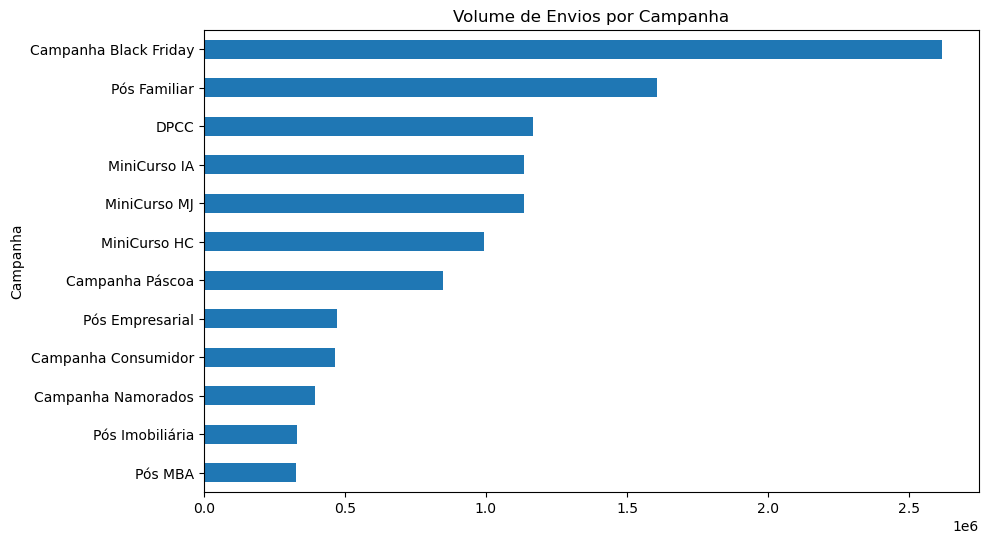

In [20]:
df.sort_values("Enviados", ascending=True).plot.barh(
    x="Campanha", y="Enviados", figsize=(10,6), legend=False)
plt.title("Volume de Envios por Campanha")
plt.show()

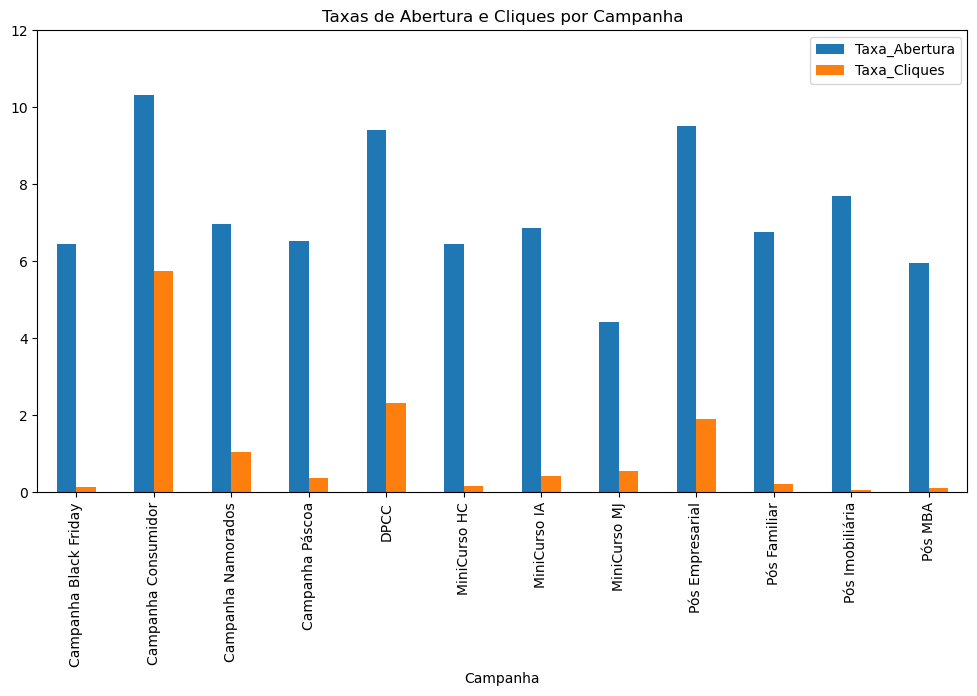

In [21]:
import matplotlib.pyplot as plt

ax = df.plot(
    x="Campanha",
    y=["Taxa_Abertura", "Taxa_Cliques"],
    kind="bar",
    figsize=(12,6)
)

plt.title("Taxas de Abertura e Cliques por Campanha")

# Força o eixo X (valores numéricos) a ir de 0 até 20
plt.ylim(0, 12)

plt.show()


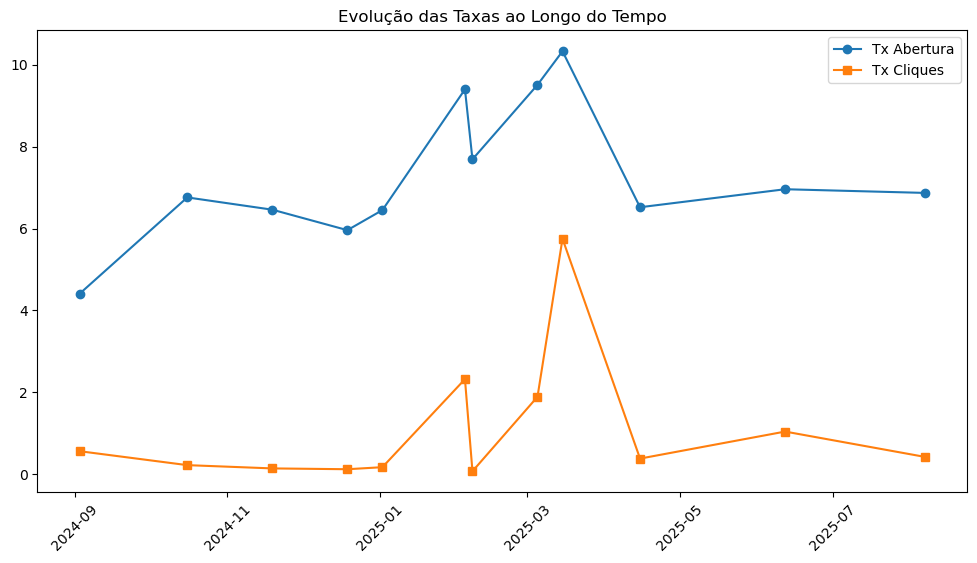

In [22]:
df_sorted = df.sort_values("Data")
plt.figure(figsize=(12,6))
plt.plot(df_sorted["Data"], df_sorted["Taxa_Abertura"], marker="o", label="Tx Abertura")
plt.plot(df_sorted["Data"], df_sorted["Taxa_Cliques"], marker="s", label="Tx Cliques")
plt.legend()
plt.title("Evolução das Taxas ao Longo do Tempo")
plt.xticks(rotation=45)
plt.show()


In [23]:
df["CTR_real"] = (df["Cliques"]/df["Abertos"])*100


In [24]:
df["Engajamento_Total"] = ((df["Abertos"]+df["Cliques"])/df["Enviados"])*100


<Axes: xlabel='Campanha'>

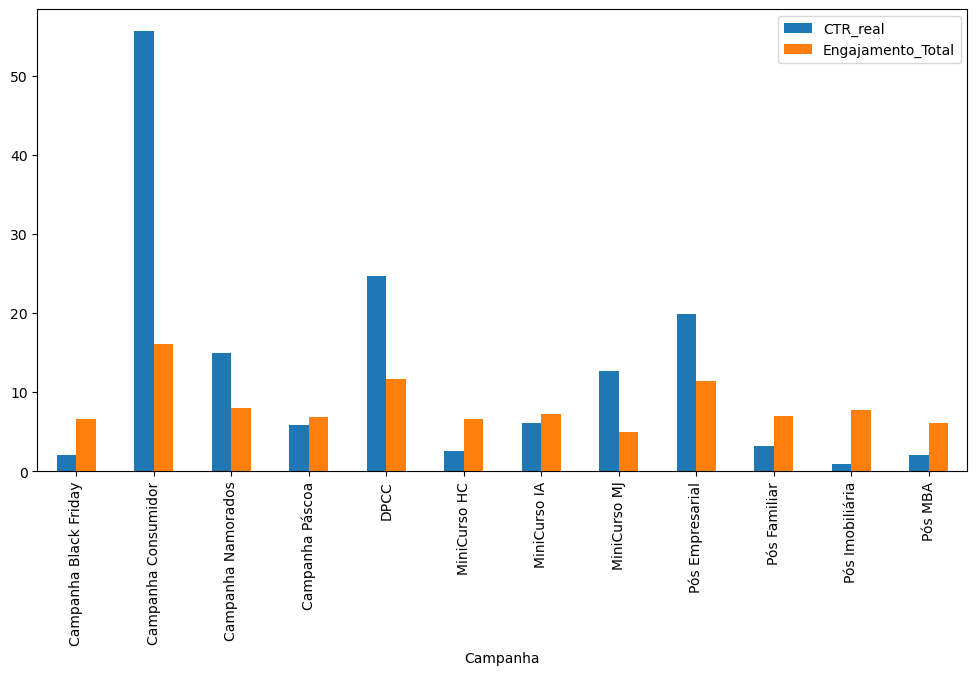

In [25]:
df.set_index("Campanha")[["CTR_real","Engajamento_Total"]].plot(kind="bar", figsize=(12,6))


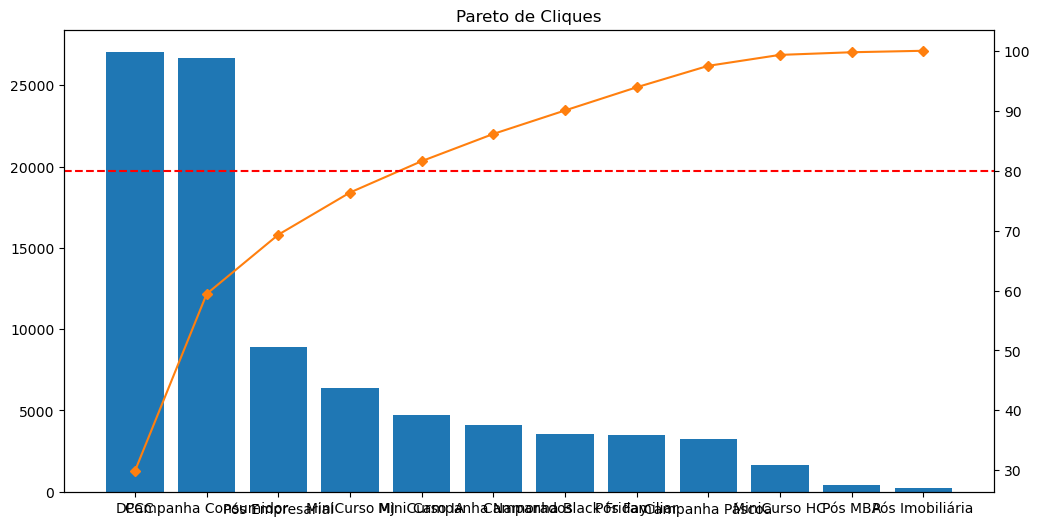

In [26]:
df_sorted = df.sort_values("Cliques", ascending=False)
df_sorted["% cumulativo"] = df_sorted["Cliques"].cumsum()/df_sorted["Cliques"].sum()*100

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.bar(df_sorted["Campanha"], df_sorted["Cliques"], color="C0")
ax2 = ax1.twinx()
ax2.plot(df_sorted["Campanha"], df_sorted["% cumulativo"], color="C1", marker="D", ms=5)
ax2.axhline(80, color="r", linestyle="--")
plt.title("Pareto de Cliques")
plt.xticks(rotation=90)
plt.show()


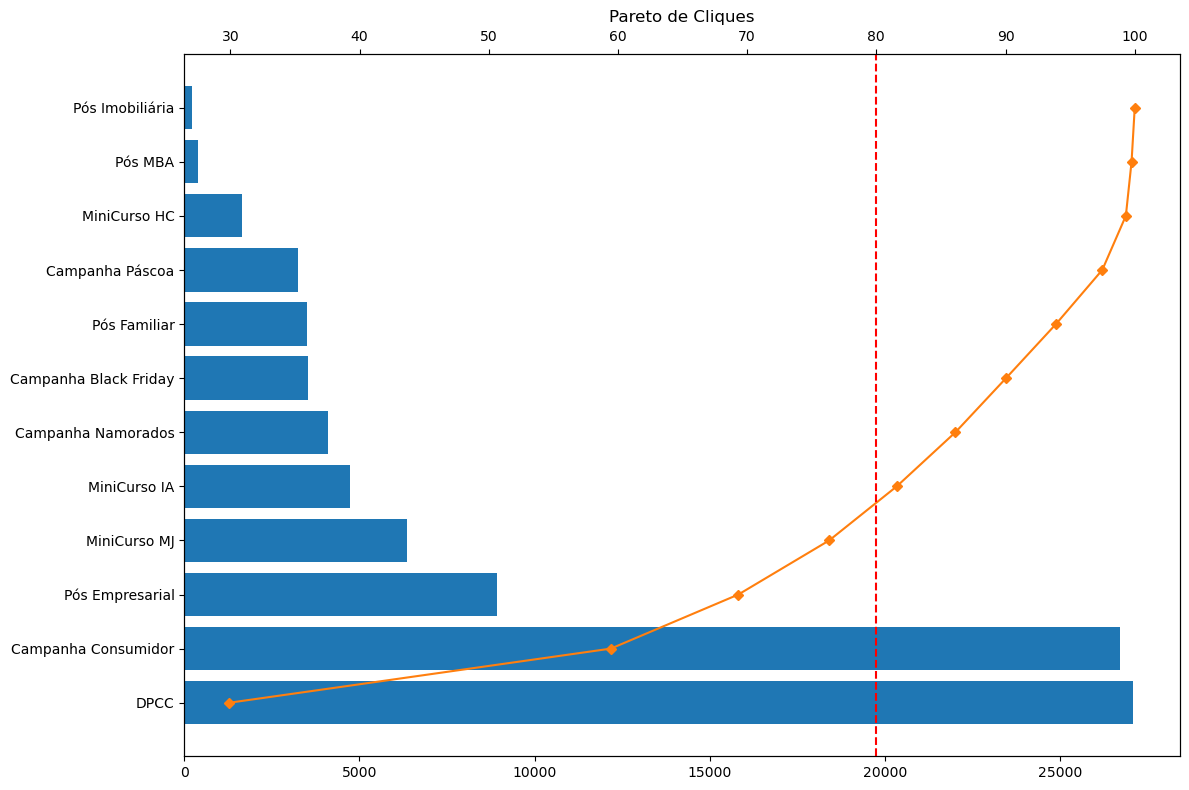

In [27]:
df_sorted = df.sort_values("Cliques", ascending=False)
df_sorted["% cumulativo"] = df_sorted["Cliques"].cumsum() / df_sorted["Cliques"].sum() * 100

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.barh(df_sorted["Campanha"], df_sorted["Cliques"], color="C0")
ax2 = ax1.twiny()
ax2.plot(df_sorted["% cumulativo"], df_sorted["Campanha"], color="C1", marker="D", ms=5)
ax2.axvline(80, color="r", linestyle="--")
plt.title("Pareto de Cliques")
plt.tight_layout()
plt.show()
